# Group Project Proposal

### *Group24: Haibin Yu, Eric Zhang, Muhan Yang, Shuhao Zhang*

## Title

An observation into testing the existence of gender inequality between the wages of men and women in Canada in 2016.

## Introduction

**Question:** Is there a significant difference in wages between men and women in the data?
The data set is the 2016 Canadian census data containing many variables and 391,938 rows. This data describes the enumeration of Canadian residents in 2016. The data is filtered to contain only the variables of interest: sex and “wages”. The sex variable in this dataset is a categorical variable represented numerically with 1 and 2 representing male and female, respectively. The variable “wages” is a quantitative variable represented by whole numbers above 0.


The response variable is the wage of the individual observed represented by “wages”.
The location parameter to be used to describe the center of the wage distribution is the median as it will not be affected by outliers in the wage data.
The scale parameter to be used is the standard deviation of wages which can be used to describe the variability of wages between males and females.
The null hypothesis for this test is that there is no difference in wages between males and females  in the dataset. The alternative hypothesis would be the existence of a difference in wages between the males and females (Pelletier, 2019). A t-test can be used to compare the median wages of males and females. Based on the p-value of the test it can be determined whether or not the null hypothesis should be rejected and determine the existence of a significant differences in wages between measles and females in the dataset.



## Preliminary Results

In [5]:
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(haven)

In [6]:
read_dta("data/01_census2016.dta") -> data

In [7]:
glimpse(data)

Rows: 391,938
Columns: 16
$ ppsort  <dbl> 453141, 732612, 143665, 52611, 36927, 268123, 700087, 488335, …
$ agegrp  <dbl+lbl> 11, 12, 15, 14,  8, 11, 11, 11, 12,  8, 15, 11,  9, 14,  8…
$ ageimm  <dbl+lbl> 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99,  2, 99, 99, 99…
$ cip2011 <dbl+lbl>  8,  6,  5, 11, 13, 13,  4, 13,  4, 13, 13,  7,  5, 13, 13…
$ fol     <dbl+lbl> 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1…
$ hdgree  <dbl+lbl>  4,  9,  6,  3,  2,  2,  9,  2,  7,  2,  2,  9,  7,  2,  2…
$ immstat <dbl+lbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1…
$ kol     <dbl+lbl> 1, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1…
$ lfact   <dbl+lbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ locstud <dbl+lbl>  6,  6,  2,  5, 99, 99,  6, 99,  6, 99, 99,  7,  7, 99, 99…
$ mrkinc  <dbl> 97000, 41000, 30000, 54000, 27000, 40000, 69000, 56000, 3000, …
$ pkids   <dbl+lbl> 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 9, 1, 9, 9, 9, 1, 1, 1, 0, 1…
$ pr      <dbl

In [8]:
# filter data with columns needed and filter out NA values for wages
data <- data %>%
    select(sex, wages)
head(data)

sex,wages
<dbl+lbl>,<dbl>
2,95000
1,19000
1,29000
2,52000
2,27000
2,57000


In [9]:
# convert sex from numeric form into categorical form for plotting later
data <- data%>% 
    mutate(sex = factor(sex, labels = c("female", "male"))) 
head(data)

sex,wages
<fct>,<dbl>
male,95000
female,19000
female,29000
male,52000
male,27000
male,57000


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Removed 56980 rows containing non-finite values (stat_boxplot).”


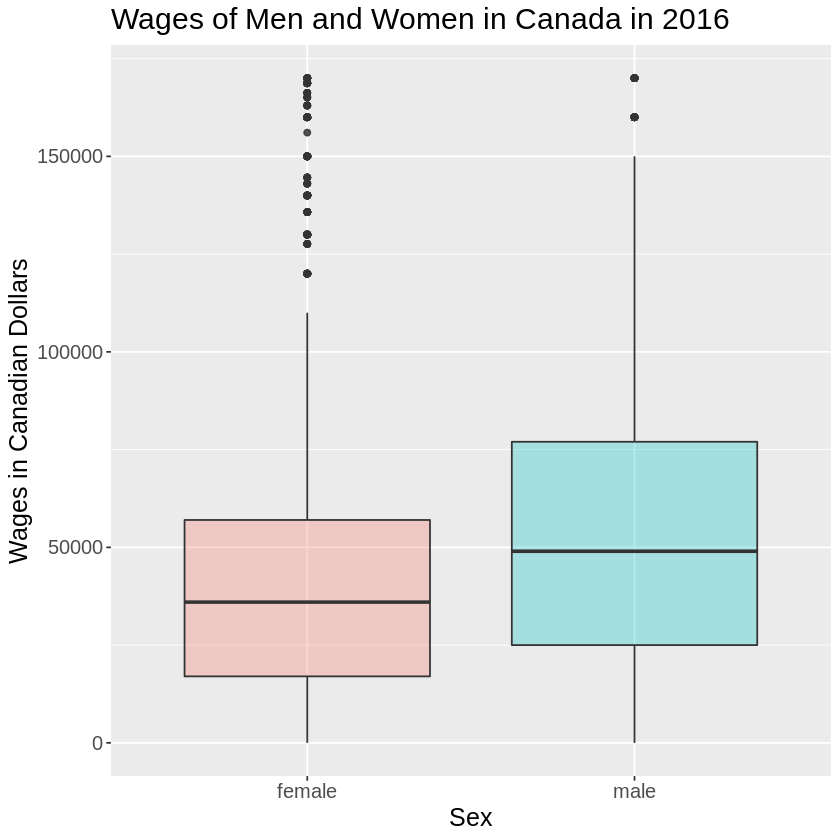

In [10]:
# using boxplot to plot the relevant raw data, as it helps to get a glimpse of the wage range of each sex and compare sample statistics
  # like mean and interquartile range between two groups


data <- 
    data %>% 
    filter(sex %in% c("female", "male"))

sex_wages_boxplots <- data %>% 
    ggplot() +
    geom_boxplot(aes(sex, wages, fill = sex),
                alpha = 0.3) + # change transparency of colours
    ylim(0,170000) + # find a suitable limit for wages (y-axis) after looking the graph with outliers beforehand
    theme(text = element_text(size = 15)) +
    ggtitle("Wages of Men and Women in Canada in 2016") + 
    xlab("Sex") + 
    ylab("Wages in Canadian Dollars") +
    guides(fill = FALSE)

sex_wages_boxplots

In [11]:
# filter out all NA values for wages, compute estimates of the parameter in the following table of summary 
# including mean, variance, and number of people for both sexes

data_summary <- data %>%
    filter(!is.na(wages)) %>%
    group_by(sex) %>%
    summarize(mean = mean(wages),
             var = var(wages),
             n = n())

data_summary

sex,mean,var,n
<fct>,<dbl>,<dbl>,<int>
female,43627.56,1500301770,165710
male,64624.87,6376656749,177353


## Methods: Plan

Issues with Plots and Estimates
Even while the preliminary research offers insightful information about the differences between men and women's salary distributions, it is insufficient to draw the conclusion that gender inequality exists without doing a hypothesis test and figuring out confidence intervals. This is so because the existing estimations just describe the data; no measure of uncertainty or level of statistical significance is provided.

We'll use the following strategies:

1. State the null hypothesis (H0) and alternative hypothesis (HA):
2. Calculate the test statistic using the t-distribution
3. Calculate the p-value using the t-distribution with the calculated degrees of freedom.
4. Compare the p-value to the significance level


Effects and Expectations
We anticipate finding statistically substantial evidence of gender pay disparity between men and women in Canada in 2016 based on the early findings. If this is confirmed, it will emphasize how crucial it is to solve the gender pay gap, thereby prompting governmental reforms and raising awareness of the problem. Initiatives to advance equal pay, foster fair work conditions, and eliminate structural barriers for women in the workplace may emerge from this.In addition, due to data limitations, we can only use data from the 2016 census. Therefore, our results can only be gender issues in 2016. As the 2021 census data has not yet been released. (it should be published in late this year).

Future question
Future questions raised by this investigation include the following:

What causes the salary difference between men and women that was seen in Canada in 2016? What role do variables like education, profession, and industry play?
What changes have been made in Canada's gender wage disparity throughout time? Exist any discernible patterns or trends



## References

References

Pelletier, R., Patterson, M., & Moyer, M. (2019, October 7). This study examines the evolution of the gender wage gap in Canada from 1998 to 2018 among employees aged 25 to 54. the contributions of various characteristics to the gap, and to the changes in the gap, are examined using Blinder-Oaxaca decomposition on hourly wage data from the Labour Force Survey. The gender wage gap in Canada: 1998 to 2018. Retrieved March 16, 2023, from https://www150.statcan.gc.ca/n1/pub/75-004-m/75-004-m2019004-eng.htm 

Skip to main content. The Gender Wage Gap: It's More Than You Think. (n.d.). Retrieved March 16, 2023, from https://www.payequity.gov.on.ca/en/LearnMore/GWG/Pages/default.aspx 
